# Practical Session 6: Modelling tasks

## Modelling task (1): Ovarian cancer data. 
We will look at the ovarian cancer from the study described here: https://pubmed.ncbi.nlm.nih.gov/11867112/. The aim was to see if early-stage ovarian cancer could be detected in blood serum. The data contains 4000 protein biomarker (proteomics) features for individuals with and without the disease.

1. Load the ovarian cancer data and explore its properties. You should obtain a dataset with 216 samples.

2. Make scatter plots of the data for marker 1 vs. marker 2 and marker 1 vs. marker 4. You should see different levels of covariance. Colour the points by diagnosis. You should see that there is no clear difference when looking at individual markers.

3. Apply principal component analysis (using pca in scikit-learn without pre scaling) to the ovarian cancer data. Make a bar chart displaying the first 10 normalised eigenvalues. You should see that PC1 explains a high amount of variance (~ 80%)

4. Make a plot of the data in the coordinate system defined by PC1 and PC2. You can use the `transform()` method of `pca`. Colour the points by diagnosis. Can you also plot PC1 vs PC3? How much of the variance is captured in these three PCs?

5. Explore the effect of a standard scaling of the data prior to the PCA. Do you get better separation?

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_csv('data-ovarian.csv', header=None)
df.head()
#np.unique(df.iloc[:,0])

0         1         2         3         4         5         6     \
0  Cancer  0.063915  0.033242  0.018484  0.008618  0.035629  0.037925   
1  Cancer  0.025409  0.051085  0.056305  0.021738  0.027410  0.014914   
2  Cancer  0.025536  0.036123  0.054195  0.009735  0.027521  0.052255   
3  Cancer  0.012817  0.029652  0.079290  0.050677  0.039737  0.057713   
4  Cancer  0.019846 -0.010577 -0.007505  0.019042  0.068786  0.061764   

       7         8         9     ...      3991      3992      3993      3994  \
0  0.028865  0.061731  0.063100  ...  0.035119  0.021515  0.017385  0.018564   
1  0.022455  0.023957  0.060527  ...  0.050841  0.055033  0.080864  0.053423   
2  0.042812  0.069087  0.069873  ...  0.029078  0.033783  0.029022  0.046397   
3  0.044492  0.034581  0.042587  ...  0.054675  0.036083  0.038598  0.048881   
4  0.039036  0.020445  0.025988  ...  0.063163  0.032044  0.026320  0.072016   

       3995      3996      3997      3998      3999      4000  
0  0.010027  0.012907  0.023405  0.038839  0.038151  0.032085  
1  0.051942  0.013187  0.028573  0.020427  0.023261  0.019975  
2  0.033288  0.041889  0.019256 -0.009447  0.021481  0.025569  
3  0.025569  0.026710  0.025122  0.047466  0.046706  0.043482  
4  0.070145  0.055744  0.051084  0.036683  0.043729  0.040289  

[5 rows x 4001 columns]

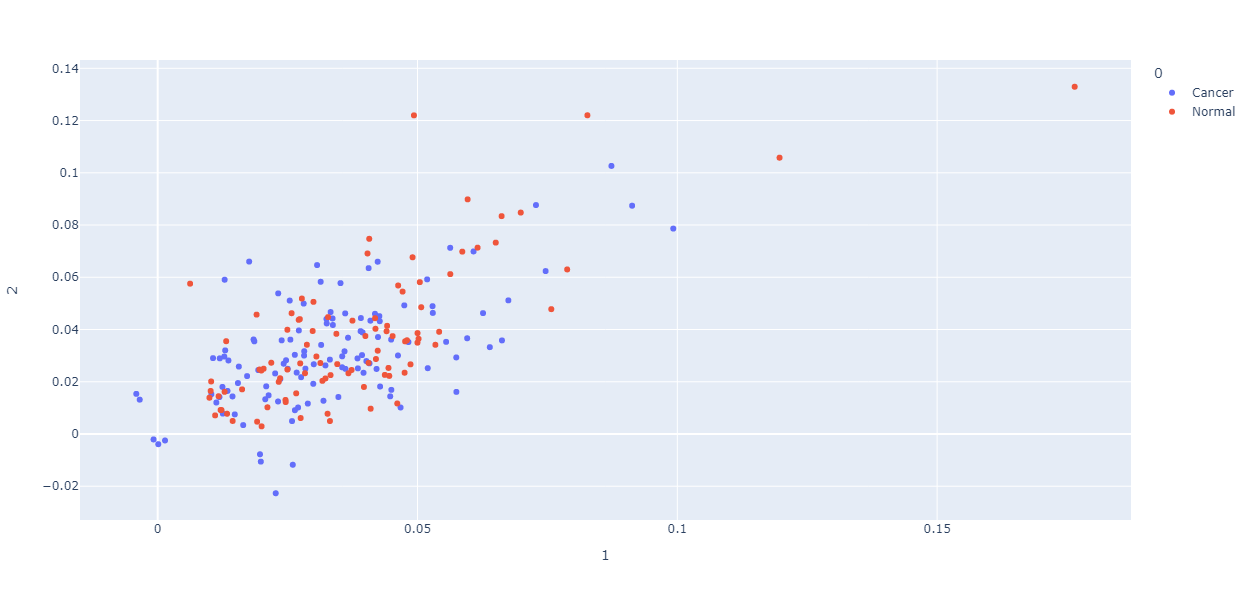

In [17]:
fig = px.scatter(df, x= 1, y= 2, color = 0, width=800, height=600)
fig.show()

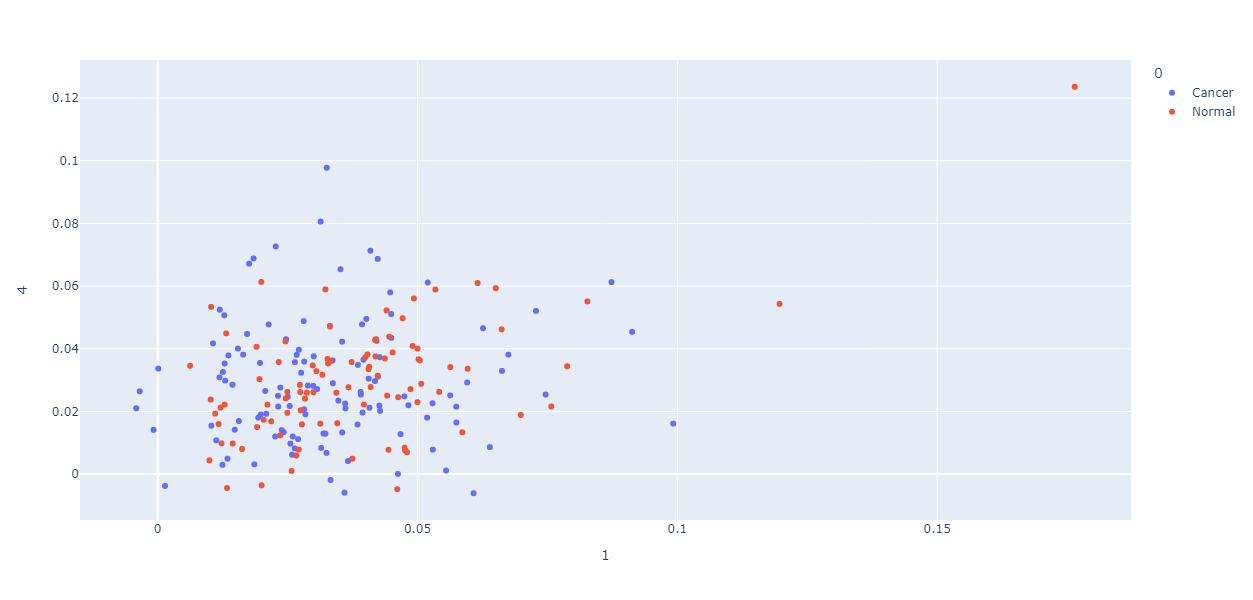

In [20]:
fig = px.scatter(df, x= 1, y= 4, color = 0, width=800, height=600)
fig.show()

In [22]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.1.2.


In [26]:
#Apply principal component analysis (using pca in scikit-learn without pre scaling) to the ovarian cancer data. 
#Make a bar chart displaying the first 10 normalised eigenvalues. You should see that PC1 explains a high amount of variance (~ 80%)
X = df.iloc[:,1:4001].to_numpy()
y = df.iloc[:,0].to_numpy()
print(X.shape)
print(y.shape)

from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA()
# fit PCA model to breast cancer data
pca.fit(X)
# transform data onto the first two principal components
X_pca = pca.transform(X)
print("Original shape: {}".format(str(X.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

(216, 4000)
(216,)
Original shape: (216, 4000)
Reduced shape: (216, 216)


In [32]:
print(X_pca)

[[ 7.96715588e+00 -1.27255971e+00 -9.39437789e-01 ... -2.33096604e-02
   2.36155203e-02  5.43857494e-15]
 [ 9.23251779e+00  3.01391923e-01  5.93108091e-01 ... -2.48648623e-04
  -4.37053264e-03  4.81396607e-15]
 [ 1.99161109e+01 -4.81114377e-01  3.23697190e+00 ... -6.42344217e-03
   7.17409239e-03  3.97338412e-15]
 ...
 [-5.93660446e-01 -5.64529273e+00 -3.52675818e+00 ... -2.47679297e-02
   2.50387819e-03  5.85696856e-15]
 [-3.90667951e+00 -6.61495211e+00 -4.35382600e+00 ... -2.23451161e-02
  -1.34713659e-01  5.83430873e-15]
 [-1.49988478e-01  2.17367187e+00  7.53062432e-01 ...  6.76868039e-02
   3.13960593e-02  5.67623205e-15]]


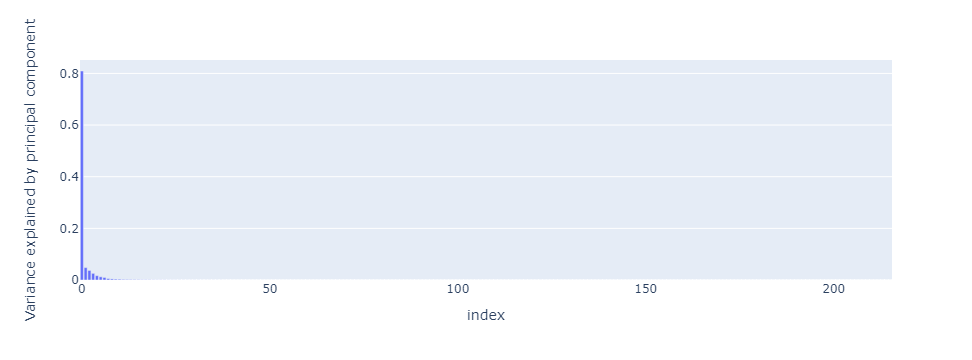

In [33]:
fig = px.bar(X_pca, y= pca.explained_variance_ratio_, labels={'y':'Variance explained by principal component'})
fig.show()

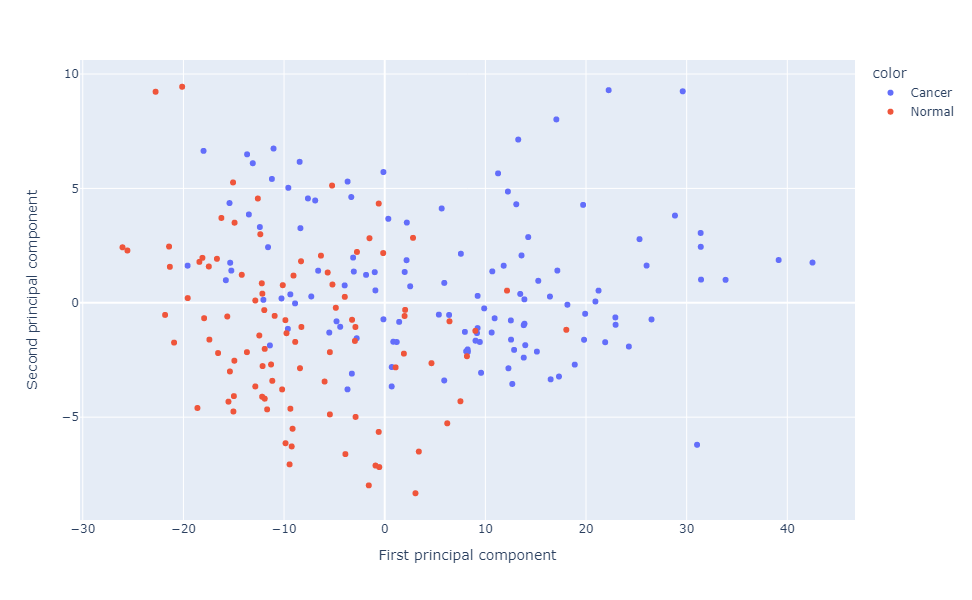

In [37]:
#Make a plot of the data in the coordinate system defined by PC1 and PC2. 
#You can use the transform() method of pca. Colour the points by diagnosis. 
#Can you also plot PC1 vs PC3? How much of the variance is captured in these three PCs?


fig = px.scatter(x= X_pca[:, 0], y= X_pca[:, 1], color = df.iloc[:,0], width=800, height=600,
                labels={'x':'First principal component', 'y': 'Second principal component'})
fig.show()

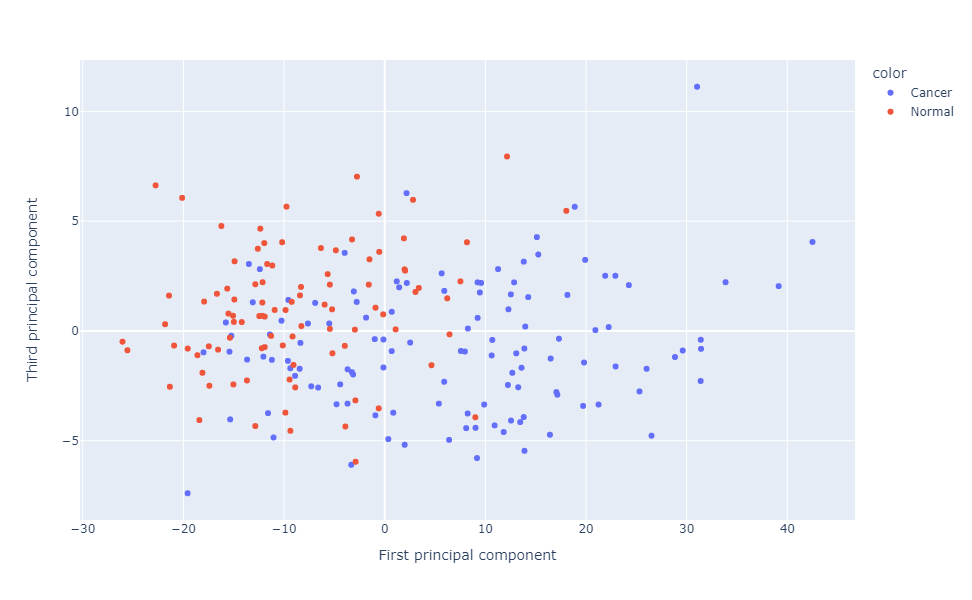

In [38]:
fig = px.scatter(x= X_pca[:, 0], y= X_pca[:, 2], color = df.iloc[:,0], width=800, height=600,
                labels={'x':'First principal component', 'y': 'Third principal component'})
fig.show()

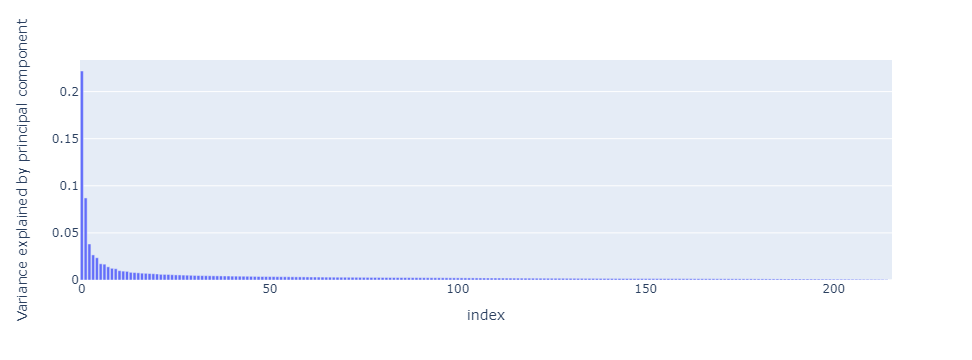

In [40]:
#Explore the effect of a standard scaling of the data prior to the PCA. Do you get better separation?
df = pd.read_csv('data-ovarian.csv', header=None)
X = df.iloc[:,1:4001].to_numpy()
y = df.iloc[:,0].to_numpy()
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
pca = PCA()
pca.fit(X_scaled)
X_pca_scaled = pca.transform(X_scaled)
fig = px.bar(X_pca_scaled, y= pca.explained_variance_ratio_, labels={'y':'Variance explained by principal component'})
fig.show()

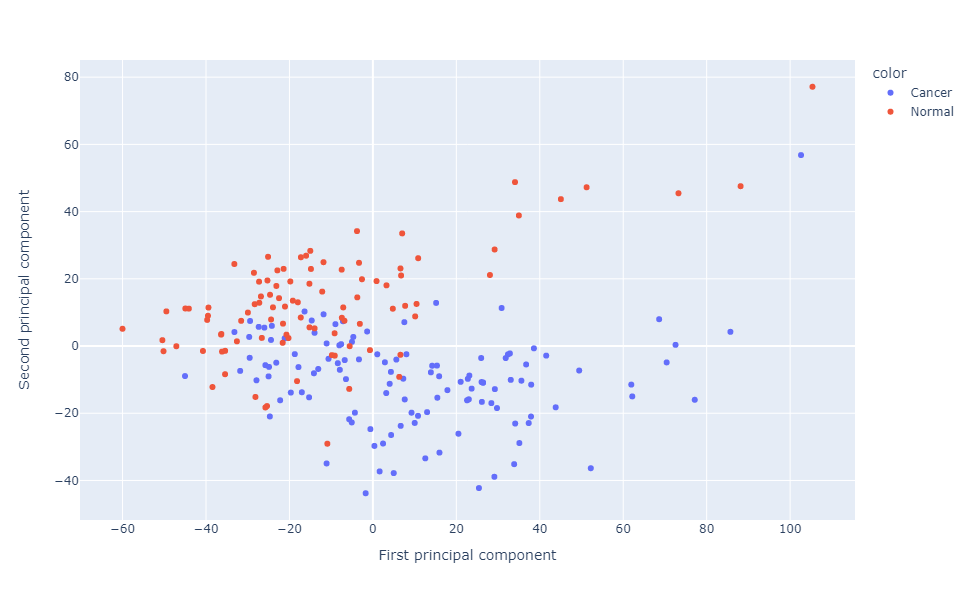

In [41]:
fig = px.scatter(x= X_pca_scaled[:, 0], y= X_pca_scaled[:, 1], color = df.iloc[:,0], width=800, height=600,
                labels={'x':'First principal component', 'y': 'Second principal component'})
fig.show()

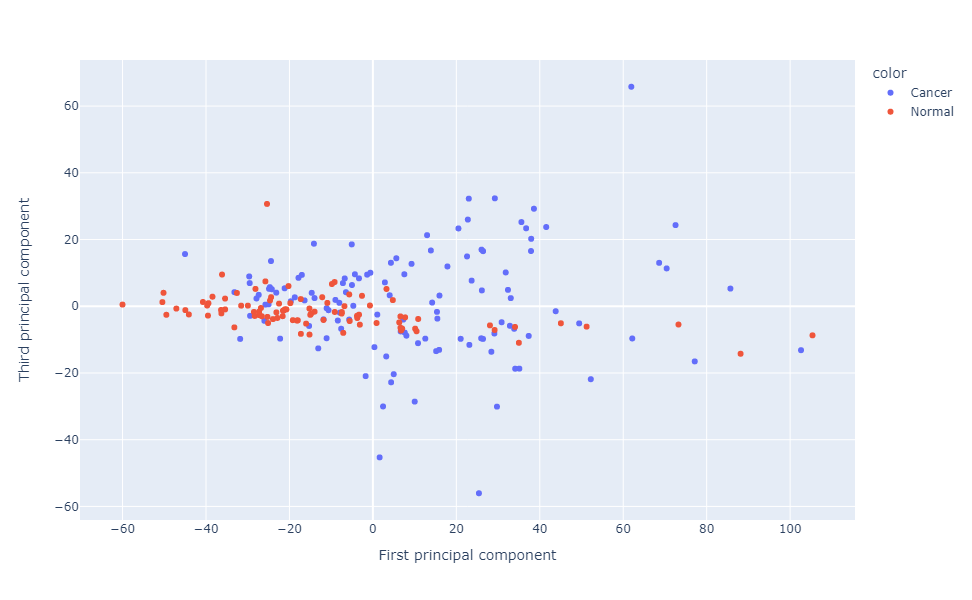

In [42]:
fig = px.scatter(x= X_pca_scaled[:, 0], y= X_pca_scaled[:, 2], color = df.iloc[:,0], width=800, height=600,
                labels={'x':'First principal component', 'y': 'Third principal component'})
fig.show()

## Modelling task (2): Single-cell gene expression data and t-SNE
We will look at some example data from this tutorial: https://ajitjohnson.com/tsne-for-biologist-tutorial/. This data should contain cells in rows and genes in columns. All rows (cells) should have a ‘unique’ cell name and all columns (genes) should also have a ‘unique’ gene name.

1. Load in the data in `single-cell-exp.csv`. Run t-SNE on the data with the default settings and plot the result. Do you get any obvious clustering?

2. Read the documentation for t-SNE: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html. Note what it says about high dimensional data.

3. Run a preprocessing step using scaling and PCA. You can keep the first 10 PCs.

4. Now try applying t-SNE. Do you get better "clumping of the data"? Explore how changinf the perplexity parameter alters the clustering.

5. Now load in the annotation data and color the t-SNE plot by cell type. Do the clusters represent the cell types?

In [50]:
df1 = pd.read_csv('single-cell-exp.csv')
df1.head()
print(df1)

                     0   TNFRSF4    CPSF3L    ATAD3C   C1orf86      RER1  \
0     AAACATACAACCAC-1 -0.171470 -0.280812 -0.046677 -0.475169 -0.544024   
1     AAACATTGAGCTAC-1 -0.214582 -0.372653 -0.054804 -0.683391  0.633951   
2     AAACATTGATCAGC-1 -0.376888 -0.295085 -0.057527 -0.520972  1.332648   
3     AAACCGTGCTTCCG-1 -0.285241 -0.281735 -0.052227 -0.484929  1.572680   
4     AAACCGTGTATGCG-1 -0.256484 -0.220394 -0.046800 -0.345859 -0.333409   
...                ...       ...       ...       ...       ...       ...   
2633  TTTCGAACTCTCAT-1 -0.290368  2.638308 -0.054510 -0.554384 -0.666646   
2634  TTTCTACTGAGGCA-1 -0.386344  2.652699 -0.058686 -0.545443  1.201866   
2635  TTTCTACTTCCTCG-1 -0.207090 -0.250464 -0.046397 -0.409737  2.193954   
2636  TTTGCATGAGAGGC-1 -0.190329 -0.226334 -0.043999 -0.354661 -0.350005   
2637  TTTGCATGCCTCAC-1 -0.333789 -0.253588 -0.052716 -0.425292 -0.457937   

      TNFRSF25   TNFRSF9  CTNNBIP1       SRM  ...     DSCR3     BRWD1  \
0     4.928496

C:\Users\anial\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\anial\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



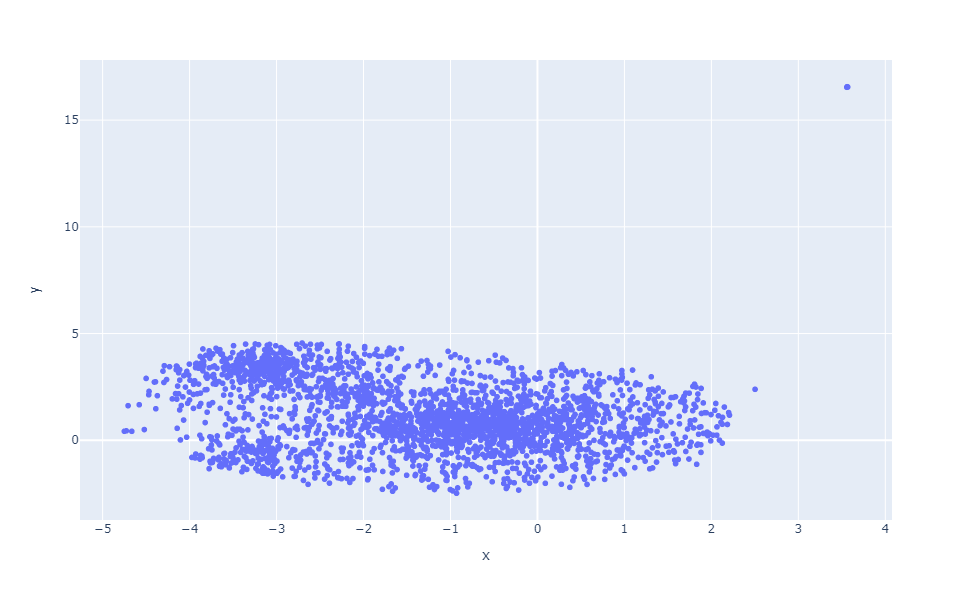

In [51]:
X = df1.iloc[:,1:1839].to_numpy()
y = df1.iloc[:,0].to_numpy()
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
rna_tsne = tsne.fit_transform(X)

fig = px.scatter(x= rna_tsne[:, 0], y= rna_tsne[:, 1], width=800, height=600,
                labels={'x':'x', 'y': 'y'})
fig.show()



[0.01791505 0.01429108 0.01036879 0.00739246 0.00309151 0.00281934
 0.00255239 0.00227642 0.00207501 0.00197618]


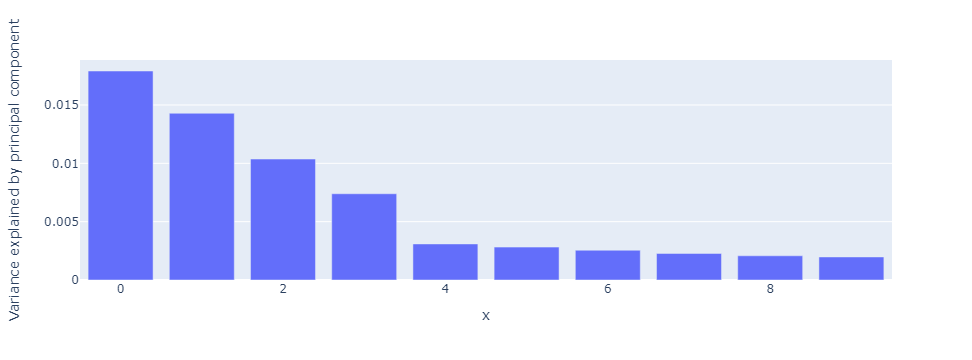

In [55]:
#Run a preprocessing step using scaling and PCA. You can keep the first 10 PCs.
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
pca = PCA(n_components= 10)
pca.fit(X_scaled)
X_pca_scaled = pca.transform(X_scaled)
exp = pca.explained_variance_ratio_[0:11]
print(exp)
fig = px.bar(x = range(0,10), y= exp, labels={'y':'Variance explained by principal component'})
fig.show()

C:\Users\anial\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\anial\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



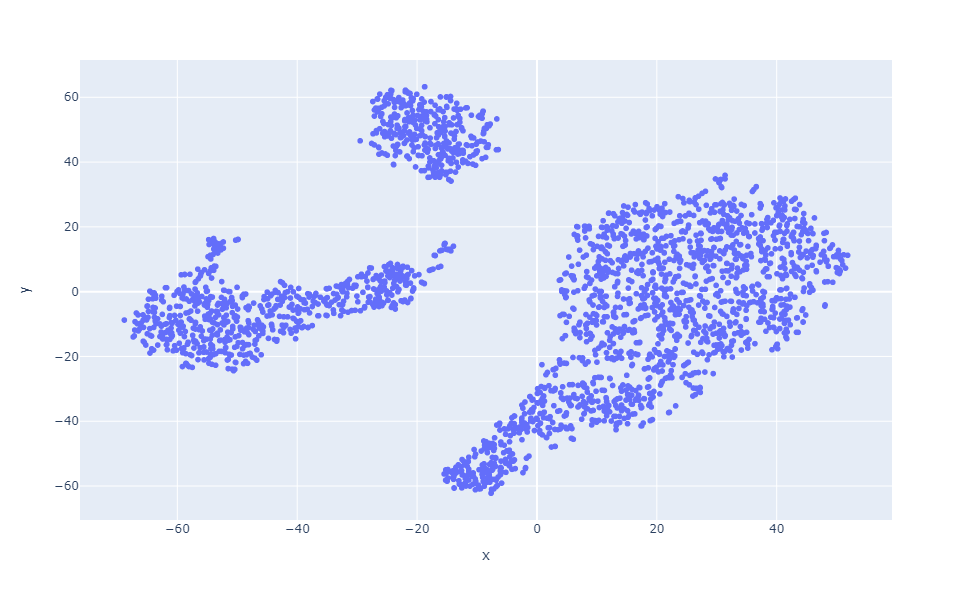

In [68]:
tsne = TSNE(random_state=42,perplexity=30.0 )
rna_tsne = tsne.fit_transform(X_pca_scaled)

fig = px.scatter(x= rna_tsne[:, 0], y= rna_tsne[:, 1], width=800, height=600,
                labels={'x':'x', 'y': 'y'})
fig.show()

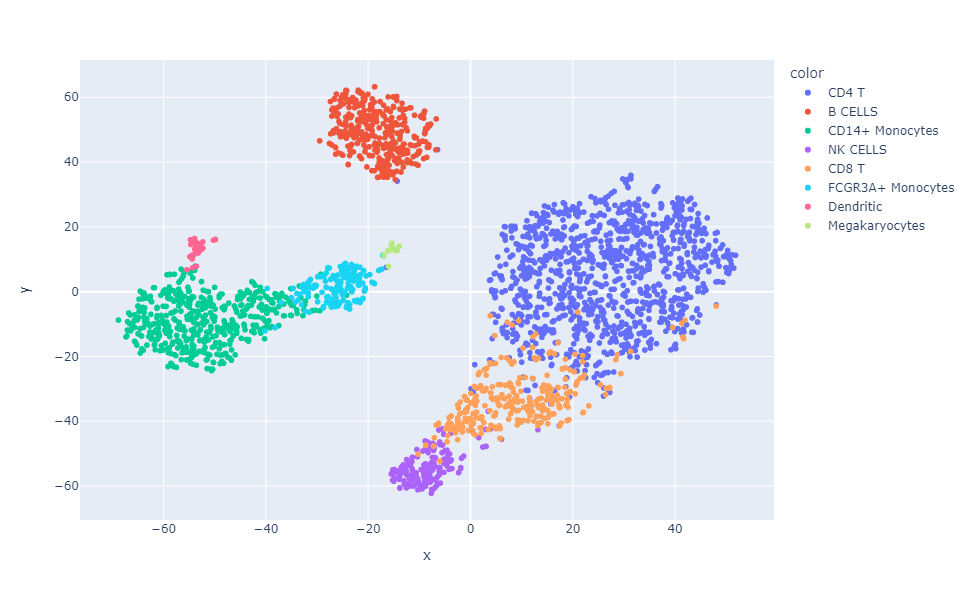

In [69]:
#Now load in the annotation data and color the t-SNE plot by cell type. Do the clusters represent the cell types?
df2 = pd.read_csv('single-cell-meta.csv')
df2.head()
fig = px.scatter(x= rna_tsne[:, 0], y= rna_tsne[:, 1], color = df2.iloc[:,4], width=800, height=600,
                labels={'x':'x', 'y': 'y'})
fig.show()